In [1]:
DIFFICULTY_TARGET=120 #seconds
DEV_ALLOC = 1106804000000000001
#EMISSION_SPEED_FACTOR_PER_MINUTE = 20 #bitshift right or divide by 2^x
EMISSION_SPEED_FACTOR_PER_MINUTE = 20
MONEY_SUPPLY = pow(2,64)-1
FINAL_SUBSIDY_PER_MINUTE = 3e11
COIN = 1e12
MAX_32INT = pow(2,32)-1
#size of block (bytes) after which reward for block calculated using block size 
CRYPTONOTE_BLOCK_GRANTED_FULL_REWARD_ZONE= 300000
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# current version is version 6; just return that.
# block times are 2 mins.

In [3]:
mainnet_hard_forks = [
  # version 1 from the start of the blockchain
  [ 1, 1, 0, 1341378000 ]
]

In [4]:
import sys

# effective speed is 19

In [5]:
def get_emission_speed(version,height,testnet):
    target_minutes = DIFFICULTY_TARGET / 60;
    return EMISSION_SPEED_FACTOR_PER_MINUTE - (target_minutes -1);


In [6]:
def get_min_block_size(version):
    min_block_size = CRYPTONOTE_BLOCK_GRANTED_FULL_REWARD_ZONE
    return min_block_size

# effective tail emission is 2* CRYPTONOTE_BLOCK_GRANTED_FULL_REWARD_ZONE

In [7]:
def get_base_reward(version, height, already_generated_coins, speed):

    if height == 1:
      return DEV_ALLOC;

    base_reward = (MONEY_SUPPLY - already_generated_coins)/ pow(2,speed);


    target_minutes = DIFFICULTY_TARGET/60;
    if(base_reward < FINAL_SUBSIDY_PER_MINUTE * target_minutes):
    
      base_reward = FINAL_SUBSIDY_PER_MINUTE * target_minutes;
    


    return base_reward;                                                             
                                                                  
    
        

In [8]:
def get_block_reward(median_size, 
                     current_block_size,
                    already_generated_coins,
                    reward,
                    version,
                    height,
                    testnet):
        
    speed = get_emission_speed(version, height, testnet);
    base_reward = get_base_reward(version, height, already_generated_coins, speed);
        
    full_reward_zone = get_min_block_size(version)
    
    #make it soft
    if (median_size < full_reward_zone):
        median_size = full_reward_zone;
    
    if current_block_size <= median_size:
        reward[0] = base_reward
        return True
    
    if current_block_size > 2 * median_size:
        raise RuntimeError("blocksize tooo big"+ str(current_block_size))
        return False
                            
    assert(median_size < MAX32_INT)
    assert(current_block_size < MAX32_INT)
    
    #penalize for over median size
    inverse_size  = 2 * median_size - current_block_size    #median 5, current 6 , multiplicand = 4
    multiplicand = inverse_size * current_block_size    # 4*6 = 24
    product_reward = base_reward * multiplicand  #base_reward = 3e11; 3e11 * 24  = 72e11
    multiplicand_reward = product_reward / median_size #72e11 / 5 = 14.4e11
    reward[0] = multiplicand_reward / median_size   #14.4e11 / 5 = 2.88e11
    return True

  
    #basically sqauring the current block size, but instead using the inverse_size * current_block size
    #then multipliing that by base reward.
    #Then divide by median sqaured. to get resulting reward.
    

x = current block size

penalty = base_reward - (((2* median_size - x) * x) * base_reward) / median_size ^2)

median_size = 1

penalty = base_reward - (((2-x)*x)*base_reward)

base_reward = 1

for numbers > 1 and less than 2

penalty = 1 - (2-x)*x

penalty = 1 - (2x - x^2)

penalty = 1- (-x^2+2x)

In [9]:
import numpy

In [10]:
x_values = numpy.linspace(1,2,50)

In [11]:
x_valueslist = x_values.tolist()

In [12]:
x_valueslist[0:5]

[1.0,
 1.0204081632653061,
 1.0408163265306123,
 1.0612244897959184,
 1.0816326530612246]

In [13]:
def get_penalty(x):
    return 1 - (2-x)*x

In [14]:
penalties = [get_penalty(x) for x in x_values]

In [15]:
penalties[0:5]

[0.0,
 0.0004164931278634043,
 0.0016659725114536172,
 0.0037484381507705278,
 0.006663890045814247]

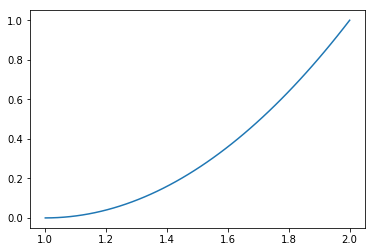

In [16]:
plt.plot(x_values,penalties)

In [17]:
# median 300000
#current 300000
#already generated = 

total_gen = 0
median = 300000
cur = 300000
version = 1
reward=[0]
testnet=False


mins_in_year = 525600
#divide by 2 for block every 2 mins
mins_per_block = 2
blocks_in_year = mins_in_year / mins_per_block

y=[]
x = []
height =0
while total_gen < MONEY_SUPPLY:
    if height==0:
        x.append(0)
        y.append(0)
        height+=1
        continue
        
    x.append(height)
    get_block_reward(median,  cur, total_gen,reward, version,height,testnet)
    total_gen +=reward[0]
    height+=1
    #append accumulated coins
    y.append(total_gen)

    
    



In [18]:
coins = [i / 1e12 for i in y]

In [19]:
coins[-5:]

[18446742.193362165,
 18446742.793362163,
 18446743.393362164,
 18446743.993362162,
 18446744.593362167]

In [20]:
len(coins)

2626449

# Years until max supply

In [21]:
len(x) /float(blocks_in_year)

9.994098173515981

# Year 1

In [22]:
plt.plot(x[0:blocks_in_year],coins[0:blocks_in_year])

# full emission schedule until max supply

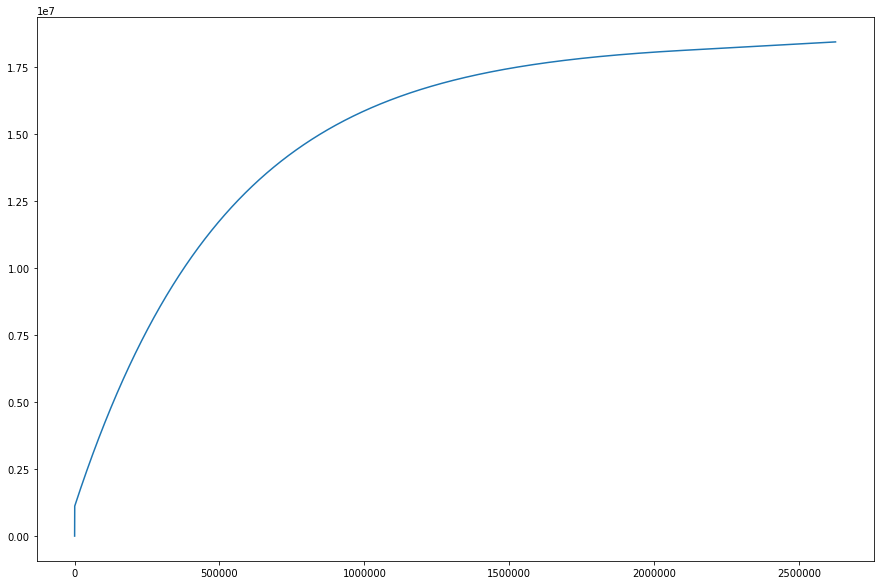

In [26]:
fig = plt.figure(1,figsize=(15,10))
axis1 = fig.add_subplot(111)
axis1.plot(x,coins)